In [3]:
%load_ext autoreload
%autoreload 2
import os
from os.path import join as oj
import pickle as pkl
from typing import Dict, Any

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.notebooks import viz
from experiments.data_util import get_clean_dataset
from experiments.config.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 11 8


In [4]:
# run comparison aggregations
!python3 "../02_aggregate_comparisons.py"

	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/sonar/train-test
	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/heart/train-test
	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/breast-cancer/train-test
	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/haberman/train-test
	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/ionosphere/train-test
	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/diabetes/train-test
	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/german-credit/train-test
	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/juvenile/train-test
	processing path /accounts/projects/vision/chandan/imodels/experiments/results/reg_data/recidivism/train-test
	processing path /ac

# classification

/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


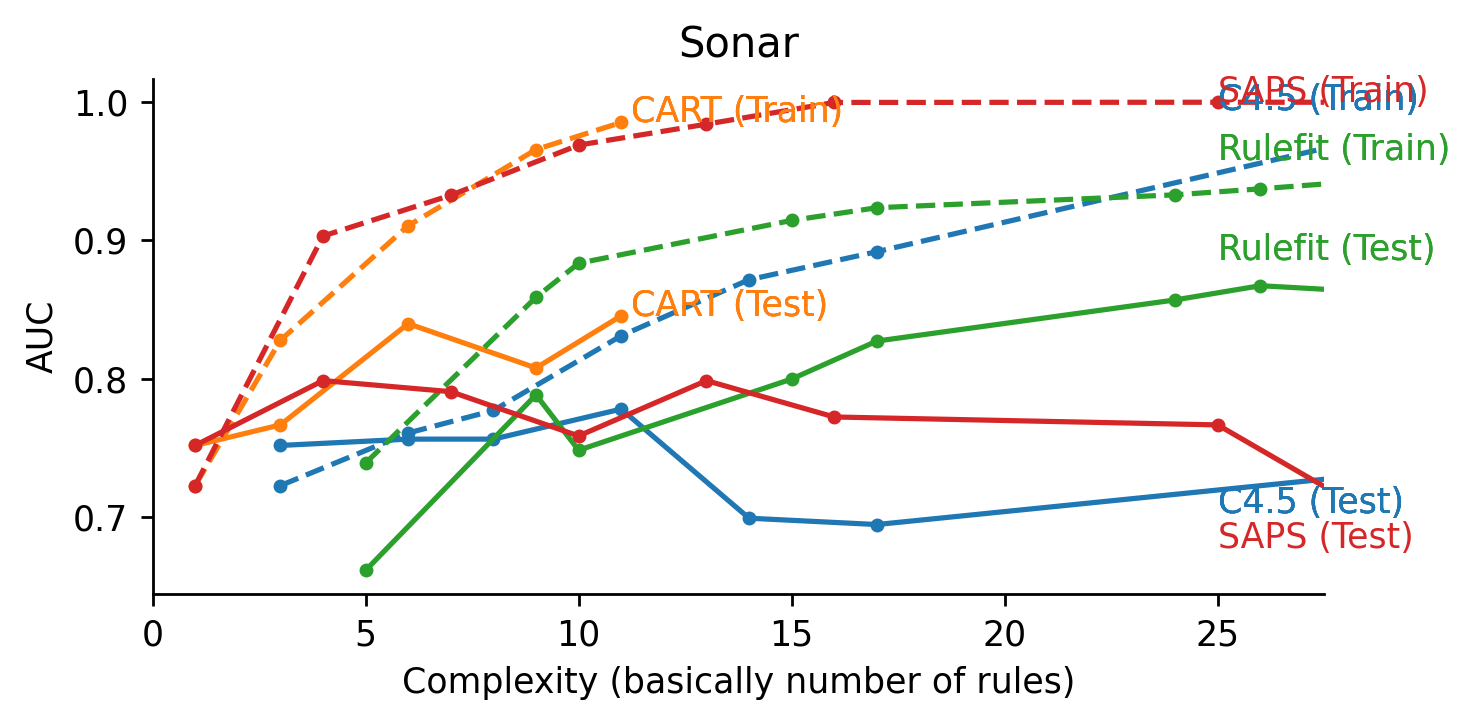

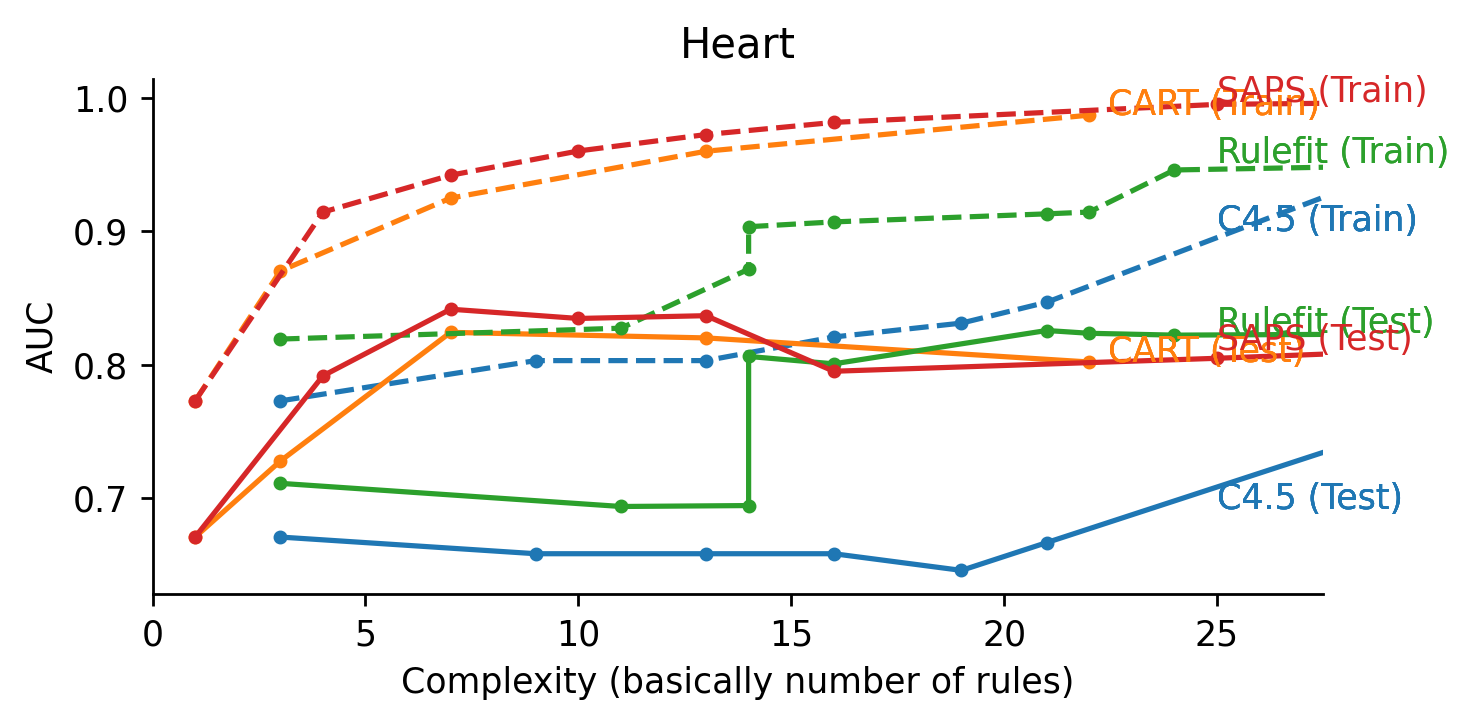

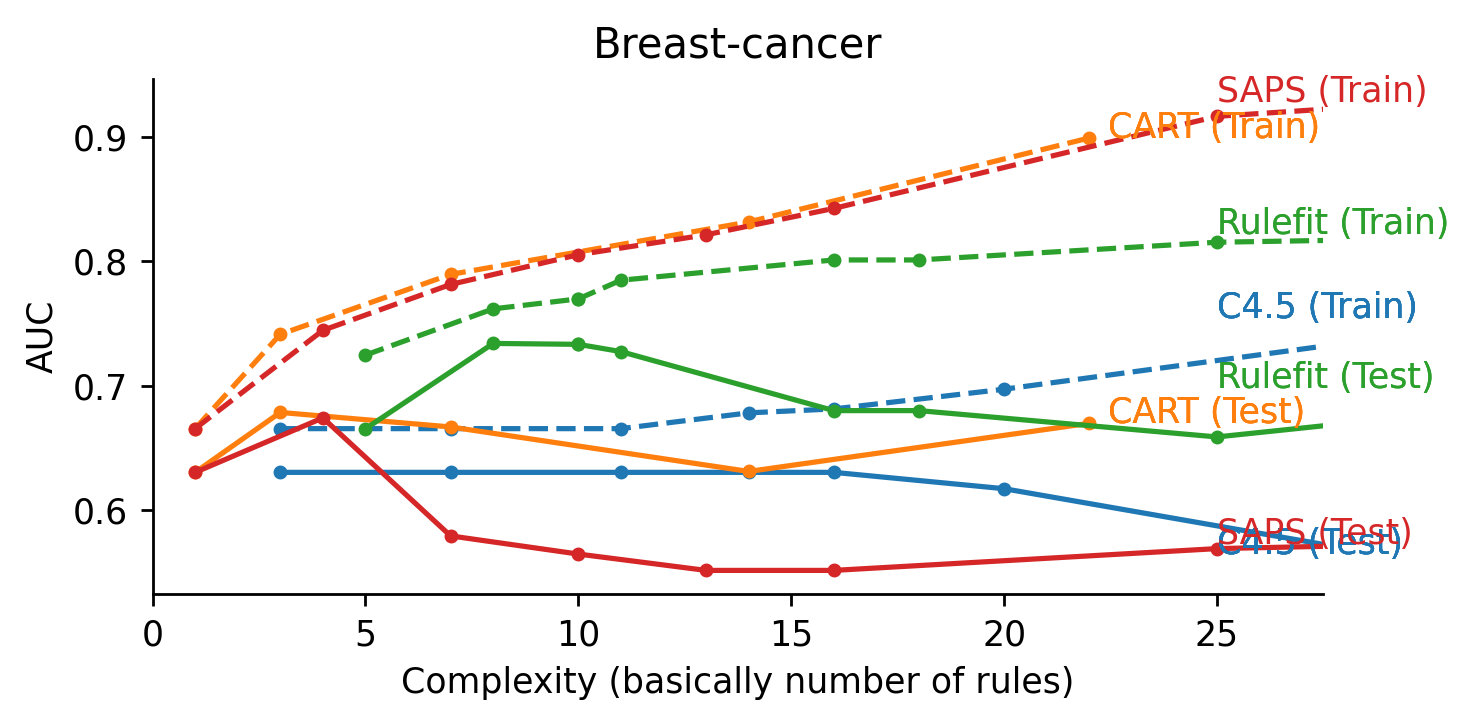

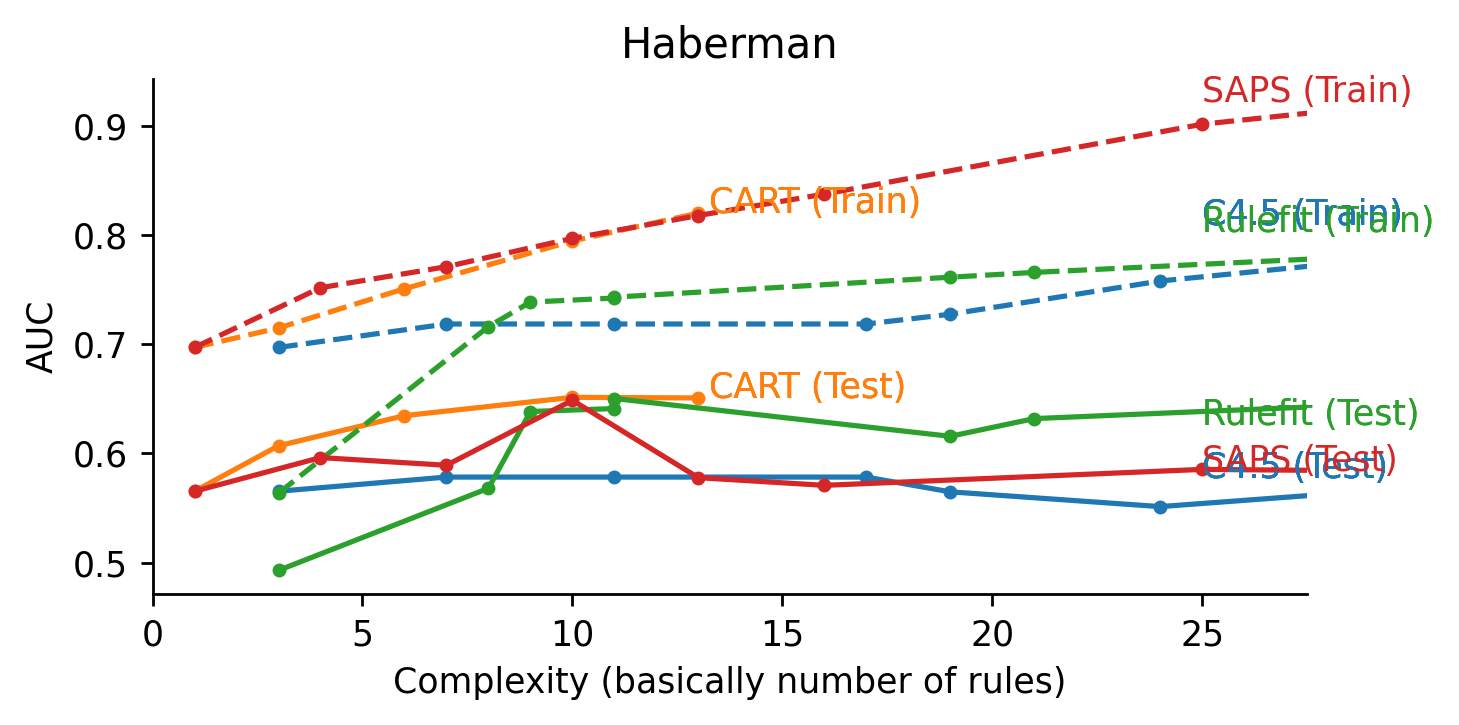

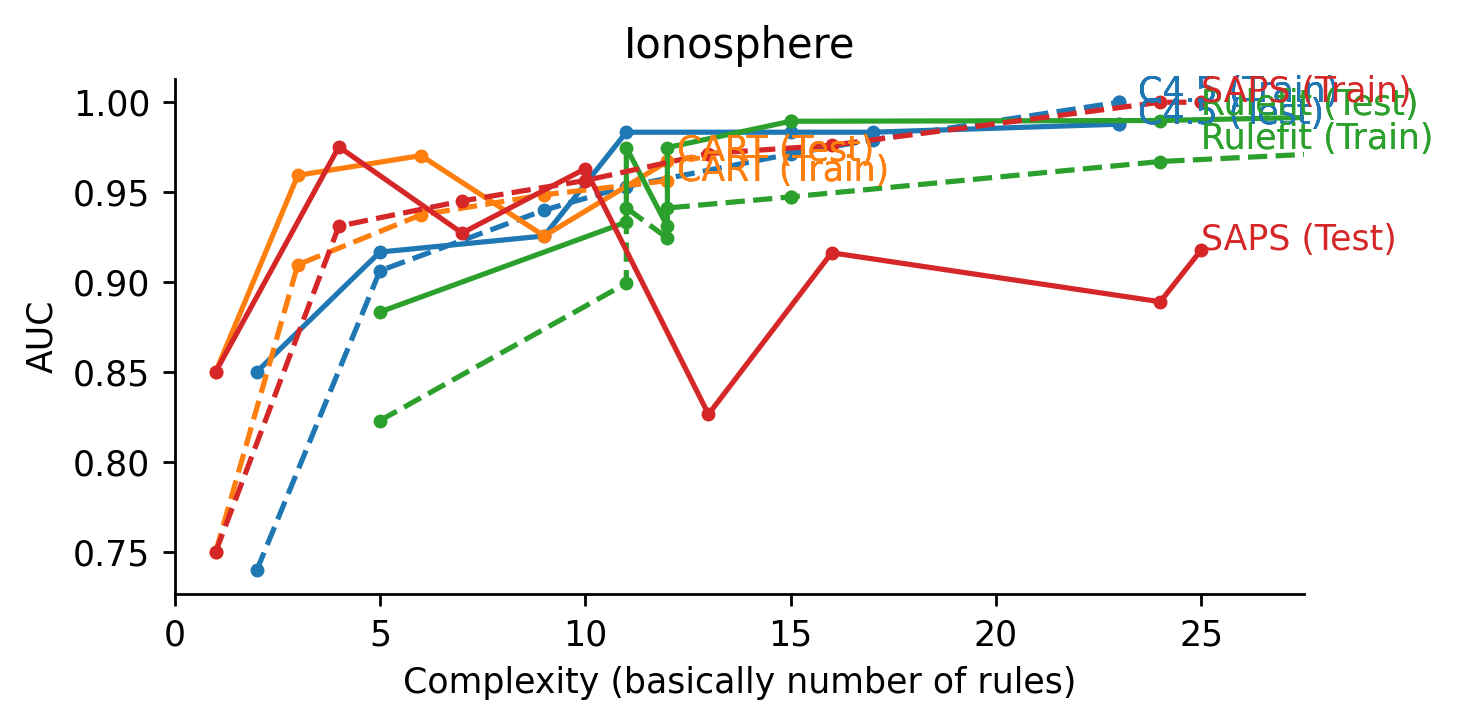

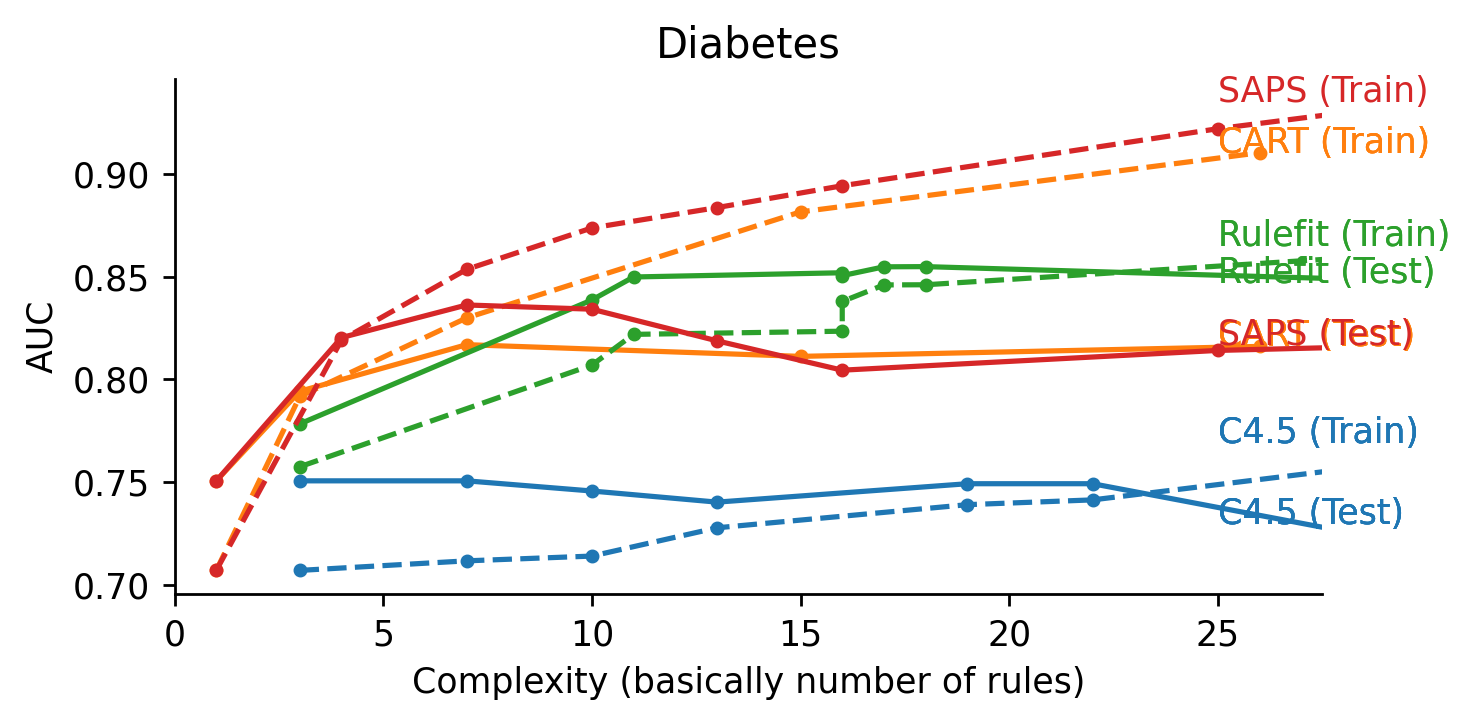

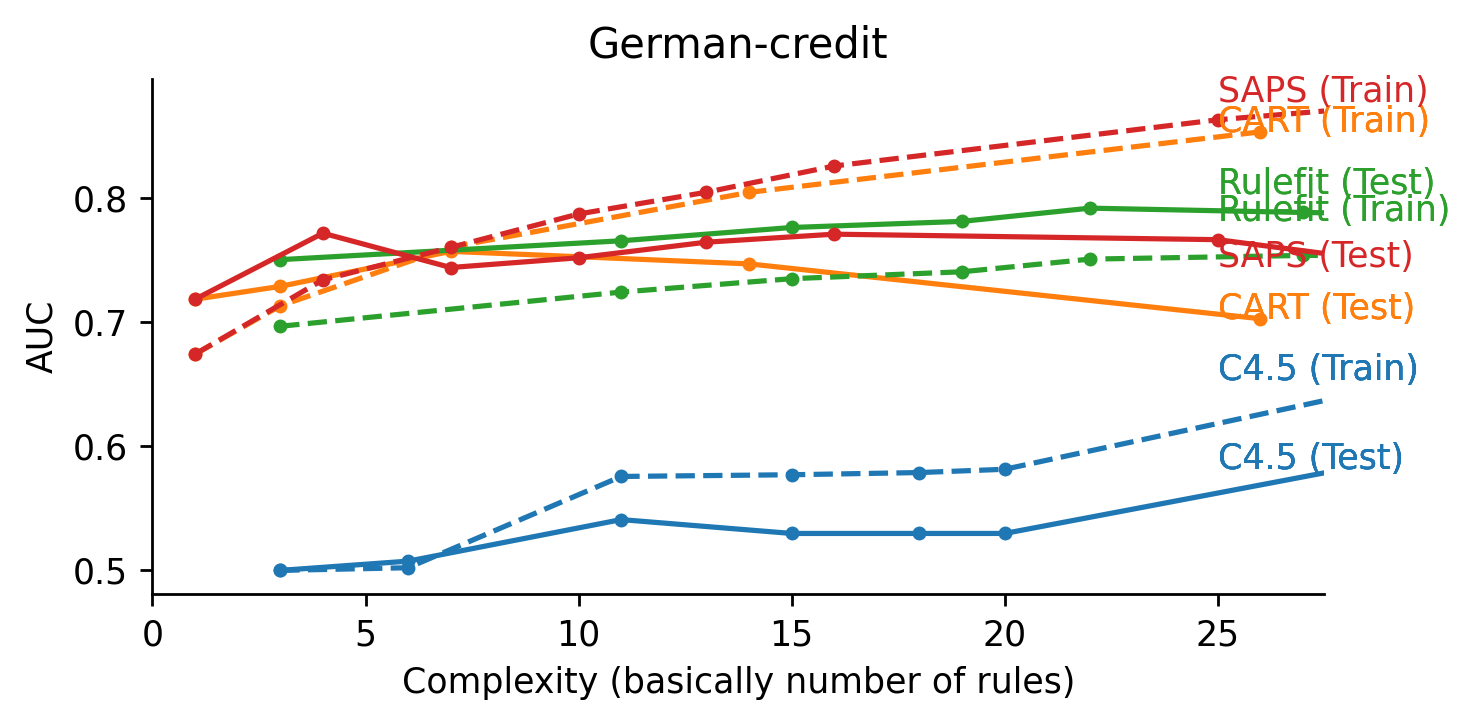

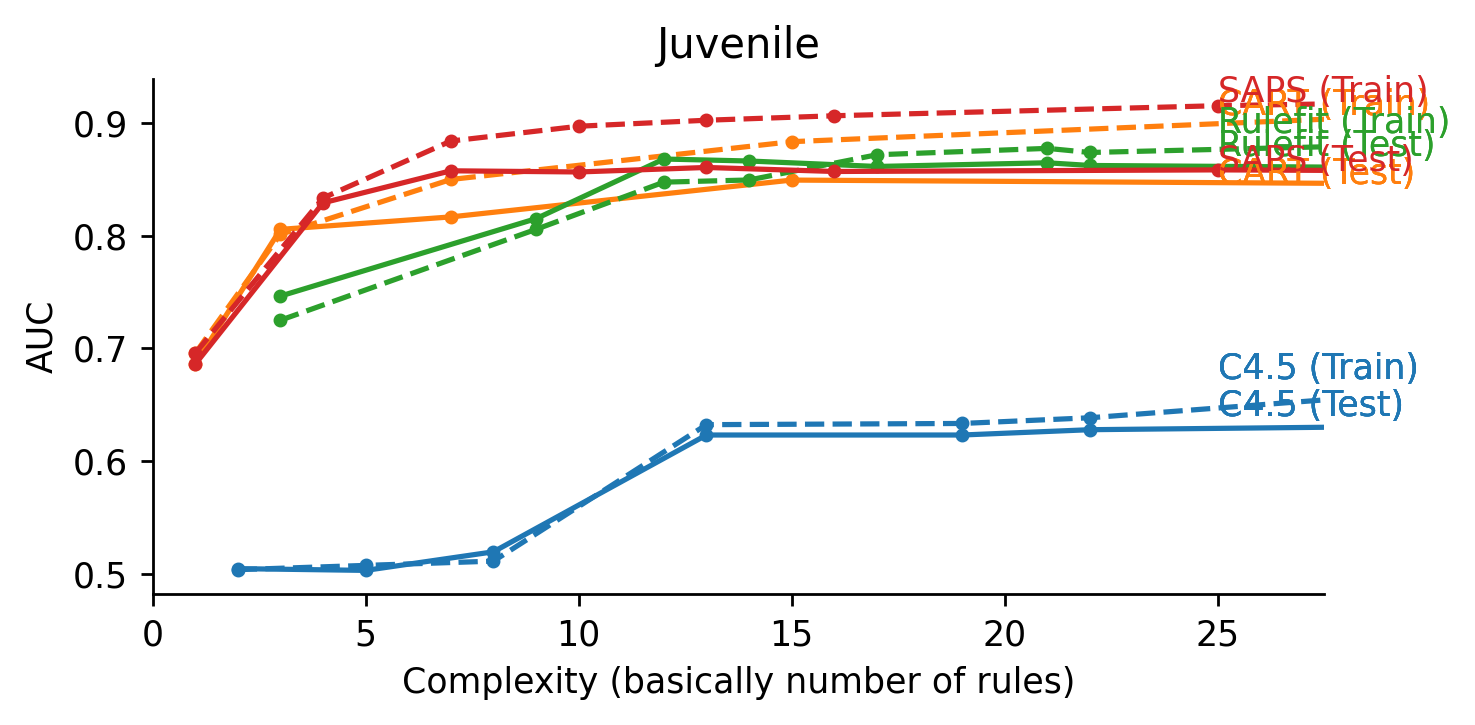

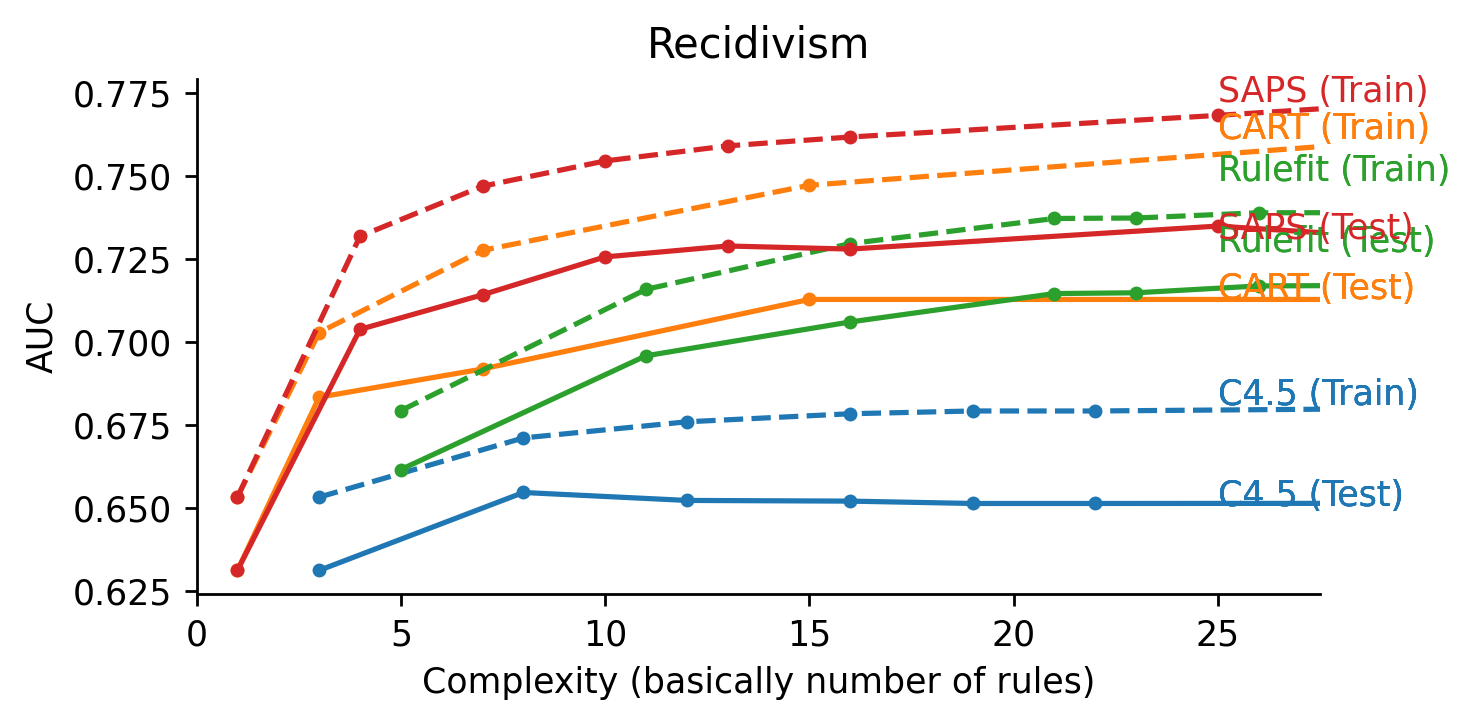

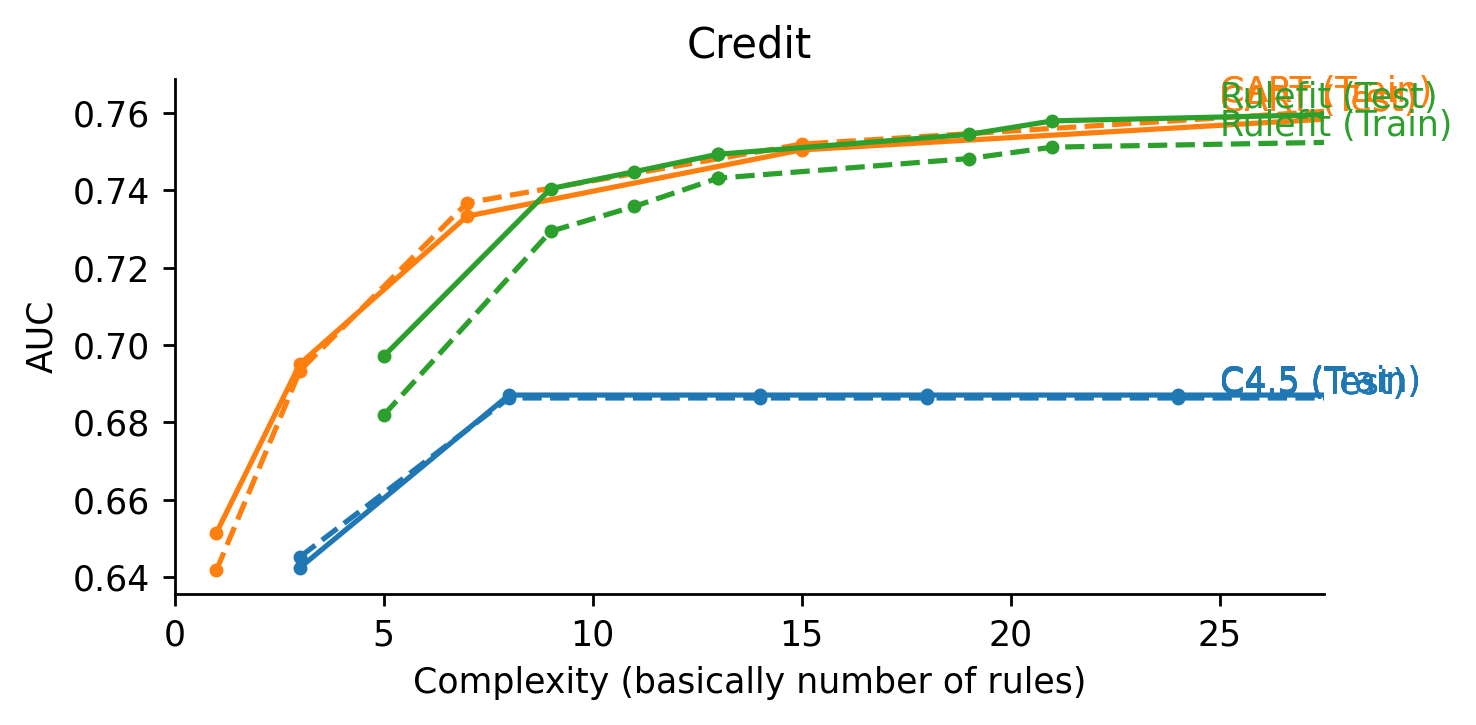

skipping readmission


In [5]:
metric = 'rocauc'
for dset in DATASETS_CLASSIFICATION:
    dset_name = dset[0]
    try:
        pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
        df = pkl.load(open(pkl_file, 'rb'))['df']
        df['model'] = df.index

    #     print(list(df.keys()))
        plt.figure(figsize=(6, 3))
    #     R, C = 1, 2
        for i, (name, g) in enumerate(df.groupby('model')):
            args = np.argsort(g[f'{dset_name}_complexity'])
            plt.title(dset_name.capitalize())
            kwargs = dict(color=colors[i])
            plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs, label=name + ' (Test)')
            plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs, label=name + ' (Train)')
            plt.xlabel('Complexity (basically number of rules)')
            plt.xlim((0, 25))
            plt.ylabel('AUC')
            dvu.line_legend(fontsize=10)
        plt.show()
    except:
        print('skipping', dset_name)

# regression

/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


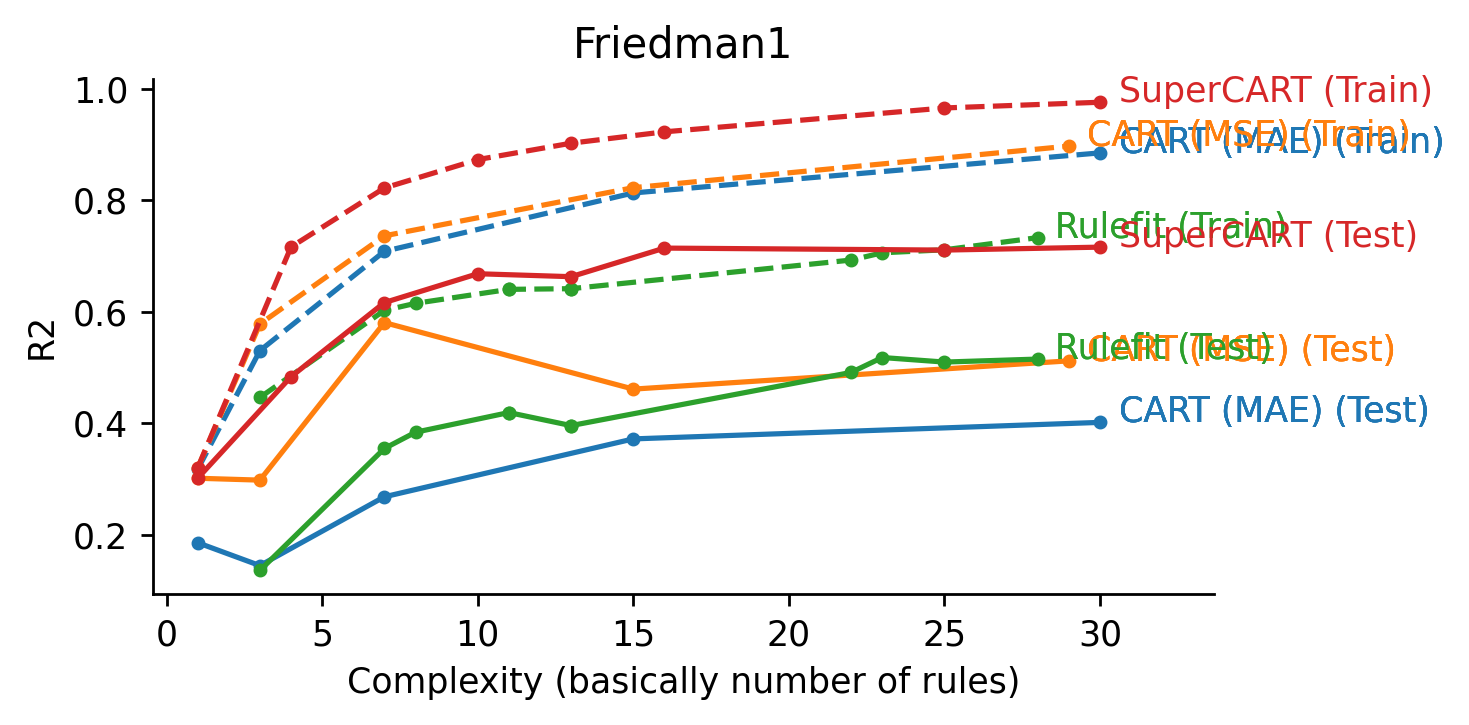

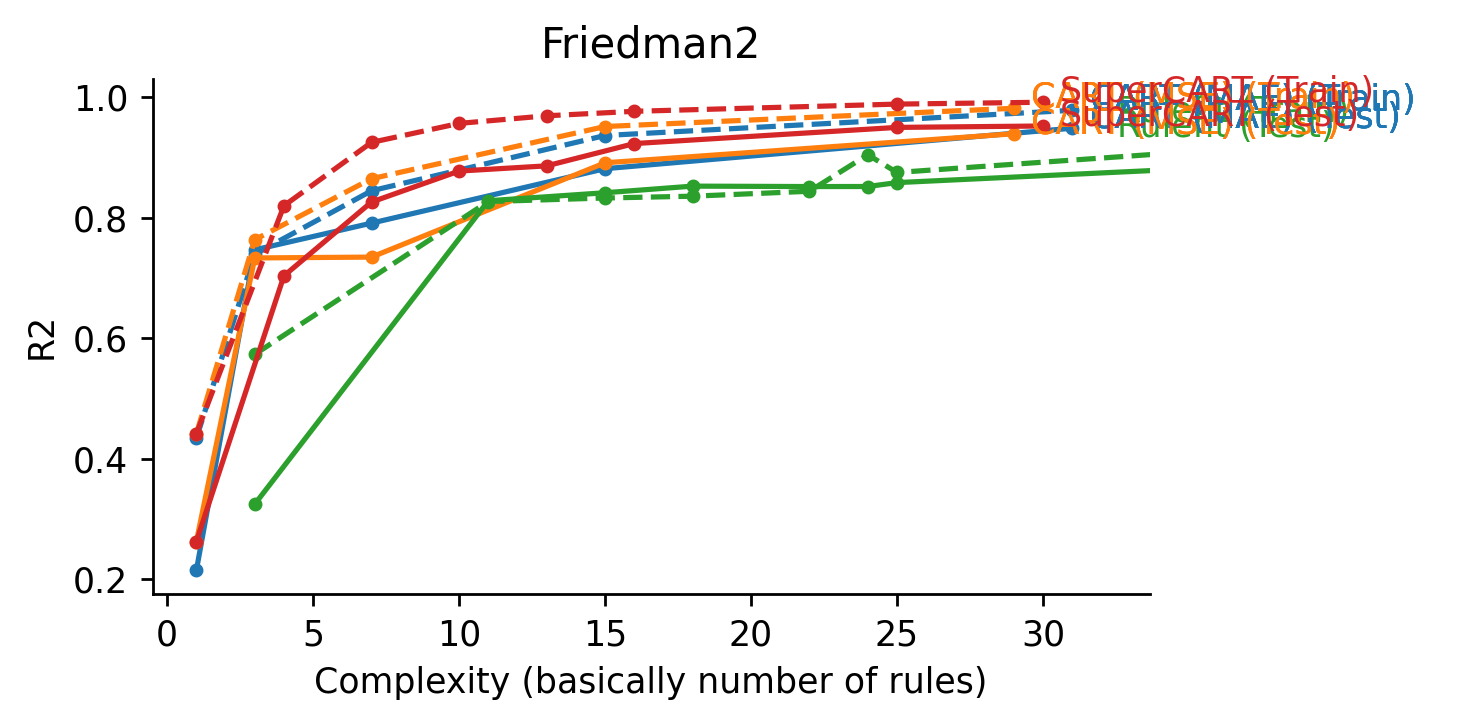

ValueError: Image size of 85805x725 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x750 with 1 Axes>

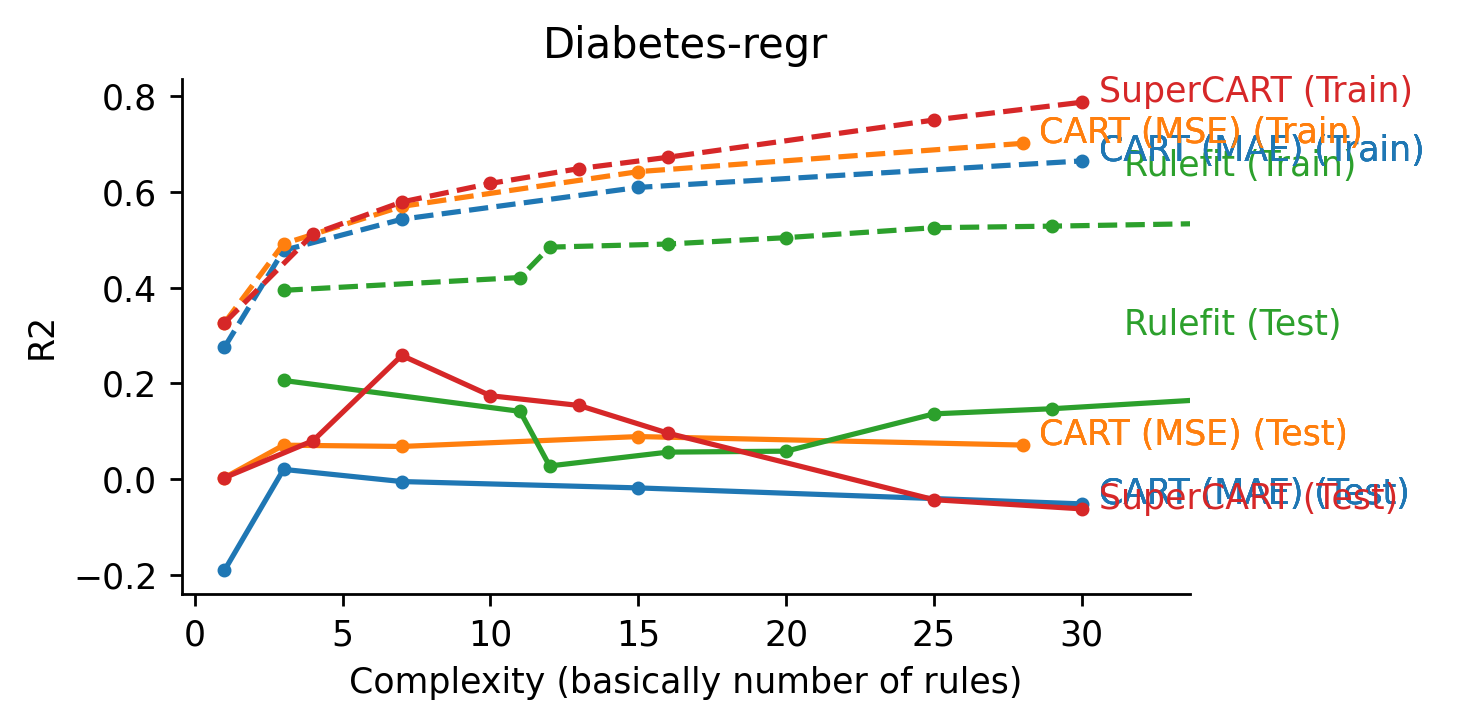

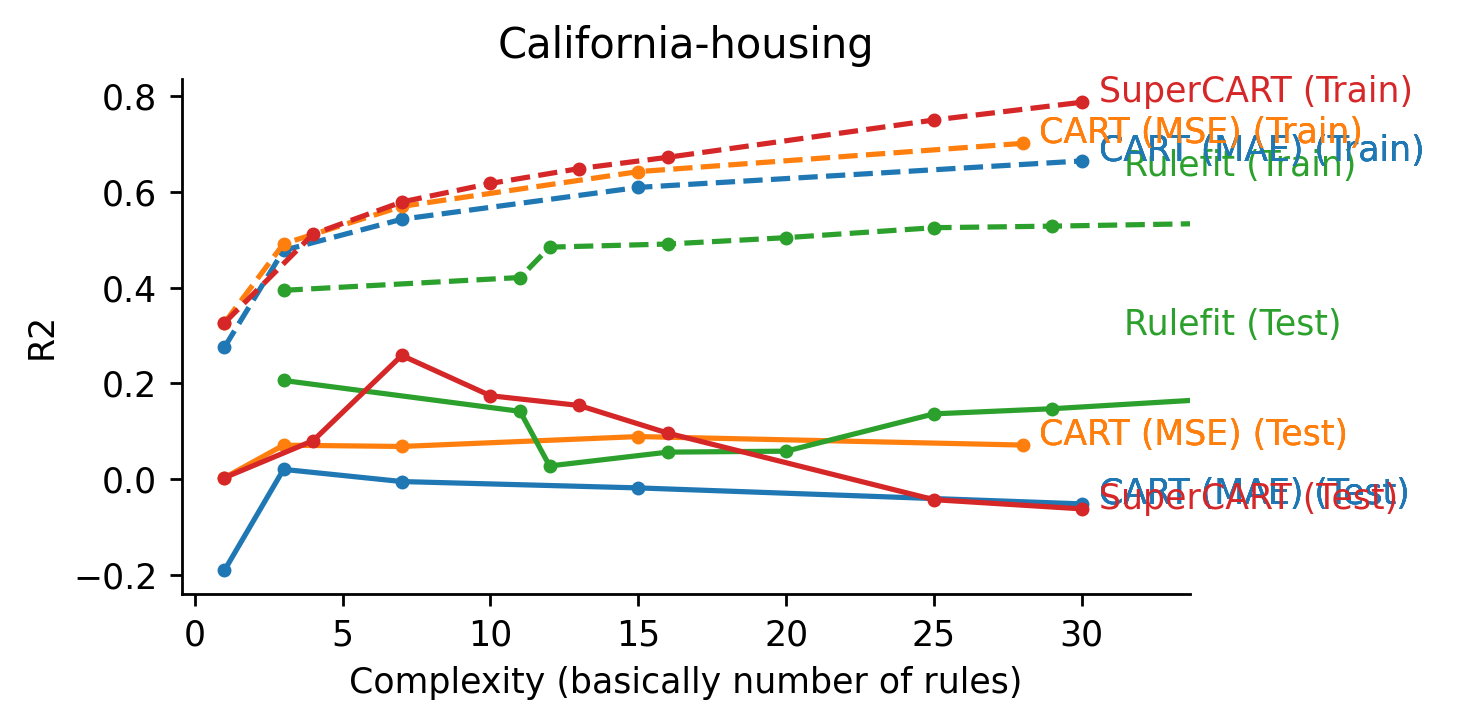

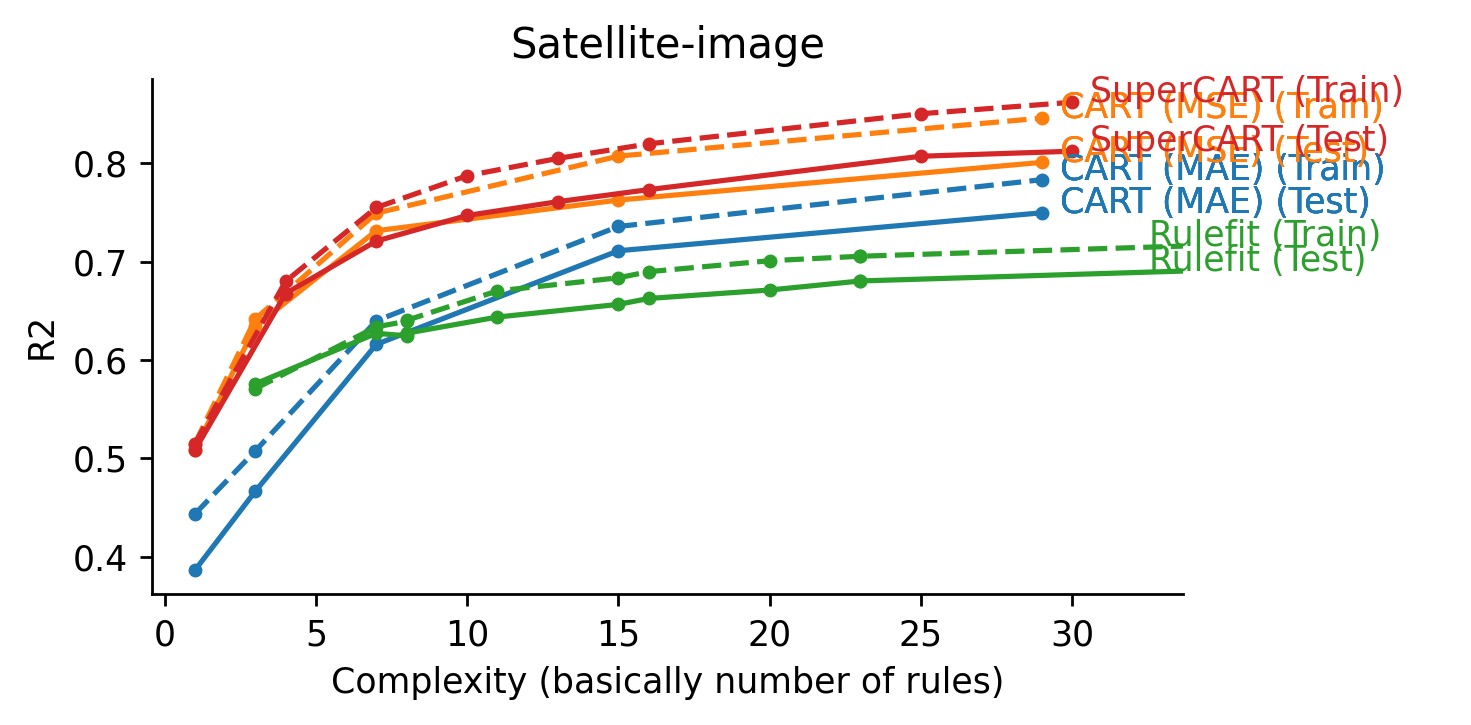

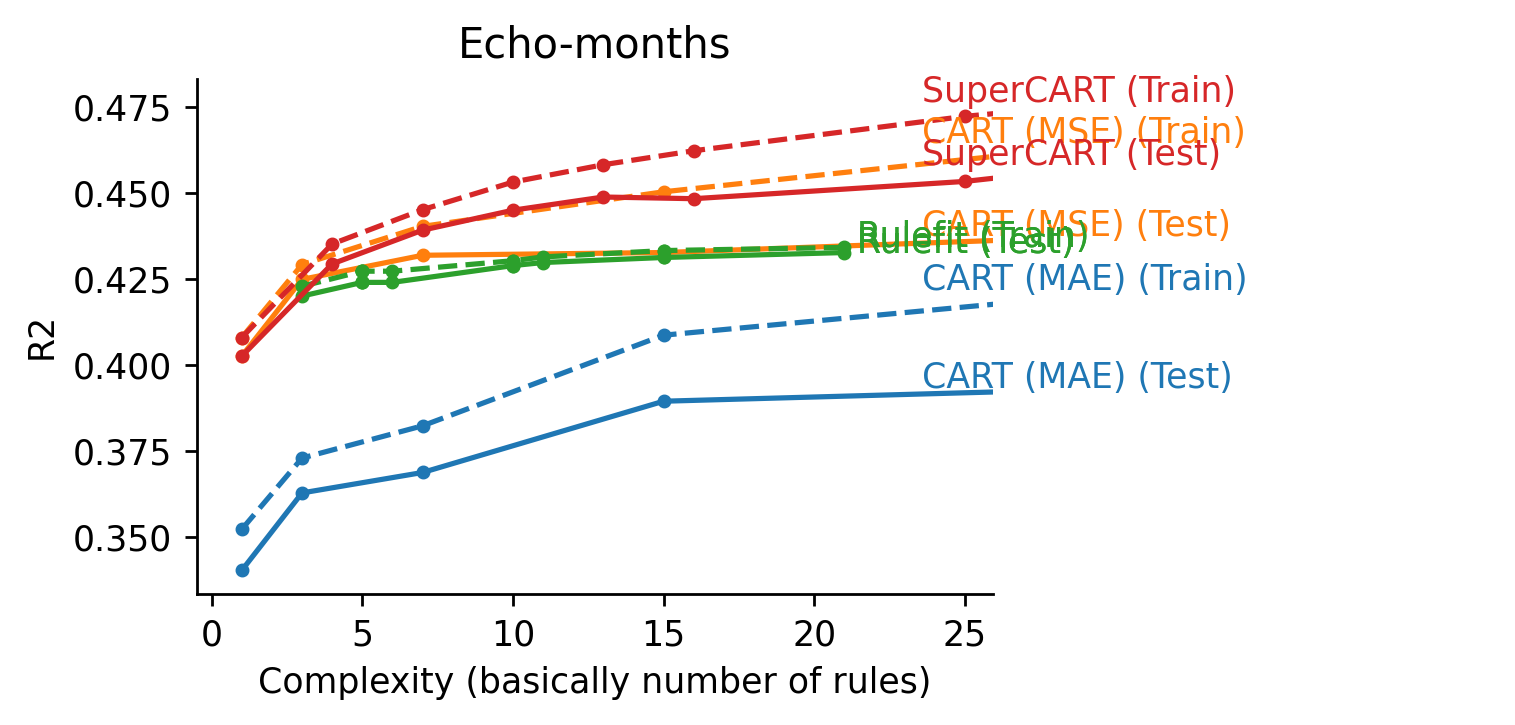

In [11]:
metric = 'r2'
for dset in DATASETS_REGRESSION:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index
    
    plt.figure(figsize=(6, 3))
#     R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs, label=name + ' (Test)')
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs, label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
#         plt.xlim((0, 25))
        plt.ylabel('R2')
        dvu.line_legend(fontsize=10)